CENSUS UNPACKED

The census is a very important collection of data on the key characteristics of the Australia population held every 5 years that helps inform many policy decision made by government. However while may see the figures widely published and the information is publically available, it is not very easy for the average person to look at since there is no platform that makes it easier to understand unless they like looking at endless excel spreadsheets. 

There is amazing amount of data and some really cool categories that are unexplored. 

For example, do you know what suburbs have the most registered carivans? Or what areas of Sydney outside the city have the highest rates of homelessness? 

These are some of the questions I hope to 'unpack' through this assignment!!!!



THE PROCESS:



STEP 1: Download census data!
    


STEP 2: Extract desired data!


In [1]:
###Listing files in a folder###

import os
#required package

path = 'CSV files/'
files = []

for r, d, f in os.walk(path):
#Using os package, opens file from the local path variable
# r=root, d=directories, f = files

    for file in f:
#Loop for all the files in the folder
        
        if file == '.DS_Store':
                pass
#Exception for the DS_Store (short for Desktop Services Store), a file on Mac
#that stores custom attributes of its containing folder, 
#such as the position of icons or the choice of a background image. 
    
        else:
                files.append(os.path.join(r, file))
#Adds file path to an empty list
    
print (files)

['CSV files/118021348_Coogee - Clovelly ', 'CSV files/118021569_Randwick - North ', 'CSV files/118021564_Kensington (NSW) ', 'CSV files/118021565_Kingsford ', 'CSV files/118021570_Randwick - South ', 'CSV files/118021350_Malabar - La Perouse - Chifley ', 'CSV files/118021568_Maroubra - West ']


In [2]:
###Reading specified information off a file###

import pandas as pd
#Package required for dataframes

temp_table= pd.DataFrame()
#creates empty dataframe

for f in files: 
    read_file = pd.read_csv(f)
    #Reads different file for each iteration

    search_criteria = read_file['Description']== "Homeless rate per 10,000 persons"
    new_info = read_file[search_criteria]
    #Searches the file and obtains rows with certain characteristic
    
print (new_info)

      Time  Value     MEASURE                       Description
1617  2011   19.0  HOMELESS_2  Homeless rate per 10,000 persons
1618  2016   17.8  HOMELESS_2  Homeless rate per 10,000 persons


In [3]:
new_info = new_info.reset_index(drop=True)
    #deletes index column. Makes it easier to compile

print (new_info)

   Time  Value     MEASURE                       Description
0  2011   19.0  HOMELESS_2  Homeless rate per 10,000 persons
1  2016   17.8  HOMELESS_2  Homeless rate per 10,000 persons


In [5]:
###Pulling out area number and name in the file name###

print ("Full file path: " + f)
#Refer to first printed line

make_string = str(f)
#Converts to string so it can be split

split_filepath = make_string.split("/")
#Splits string by / character

name_and_code= split_filepath[1]
#Chooses 2nd part. Remember index starts from zero!

split_name_and_code= name_and_code.split("_")
#Another split of nominated 2nd part by _ character

area_code = split_name_and_code[0]
area_name = split_name_and_code[1]
#Assigns variable for further breakdown for area name and code

print ("area_code: " + area_code)
print ("area_name: " + area_name)
#Prints result nice and clearly

Full file path: CSV files/118021568_Maroubra - West 
area_code: 118021568
area_name: Maroubra - West 


In [7]:
###Adding columns with area number and name###

area_column = [area_name,area_name]
code_column = [area_code,area_code]
new_info['Code'] = code_column
new_info['Area'] = area_column
    #Adds new column with area name and code
    
print (new_info)

   Time  Value     MEASURE                       Description       Code  \
0  2011   19.0  HOMELESS_2  Homeless rate per 10,000 persons  118021568   
1  2016   17.8  HOMELESS_2  Homeless rate per 10,000 persons  118021568   

               Area  
0  Maroubra - West   
1  Maroubra - West   


In [25]:
###Loop combining elements above all the files###

#Note: only new part annontated

temp_table= pd.DataFrame()

for f in files: 
    read_file = pd.read_csv(f)

    search_criteria = read_file['Description']== "Homeless rate per 10,000 persons"
    new_info = read_file[search_criteria]

    new_info = new_info.reset_index(drop=True)
    
    make_string = str(f)
    split_filepath = make_string.split("/")
    name_and_code= split_filepath[1]
    split_name_and_code= name_and_code.split("_")
    area_code = split_name_and_code[0]
    area_name = split_name_and_code[1]
 
    area_column = [area_name,area_name]
    code_column = [area_code,area_code]
    new_info['Code'] = code_column
    new_info['Area'] = area_column

    main_table = pd.concat([new_info, temp_table], axis=0)
    temp_table = main_table
    #Combines data from each iteration into one table


In [26]:
###Formatting: removing unneccessary column/words###

main_table= main_table.drop ("MEASURE",axis=1)
#Deletes measure column
#Note: axis = 1 command changes the drop command from rows to columns

pd.set_option('display.expand_frame_repr', False)
#Increases dataframe display width. Default breaks it up into two tables

print(main_table)

   Time  Value                       Description       Code                             Area
0  2011   19.0  Homeless rate per 10,000 persons  118021568                 Maroubra - West 
1  2016   17.8  Homeless rate per 10,000 persons  118021568                 Maroubra - West 
0  2011   33.4  Homeless rate per 10,000 persons  118021350  Malabar - La Perouse - Chifley 
1  2016   29.7  Homeless rate per 10,000 persons  118021350  Malabar - La Perouse - Chifley 
0  2011   88.5  Homeless rate per 10,000 persons  118021570                Randwick - South 
1  2016  102.7  Homeless rate per 10,000 persons  118021570                Randwick - South 
0  2011   59.5  Homeless rate per 10,000 persons  118021565                       Kingsford 
1  2016  106.1  Homeless rate per 10,000 persons  118021565                       Kingsford 
0  2011   60.2  Homeless rate per 10,000 persons  118021564                Kensington (NSW) 
1  2016   61.1  Homeless rate per 10,000 persons  118021564           

In [27]:
###Formatting: Table with 2016 Data only###

main_table= main_table.drop(0)
#Drops all rows with index 0 (also 2011 rows)

print(main_table)

   Time  Value                       Description       Code                             Area
1  2016   17.8  Homeless rate per 10,000 persons  118021568                 Maroubra - West 
1  2016   29.7  Homeless rate per 10,000 persons  118021350  Malabar - La Perouse - Chifley 
1  2016  102.7  Homeless rate per 10,000 persons  118021570                Randwick - South 
1  2016  106.1  Homeless rate per 10,000 persons  118021565                       Kingsford 
1  2016   61.1  Homeless rate per 10,000 persons  118021564                Kensington (NSW) 
1  2016   62.9  Homeless rate per 10,000 persons  118021569                Randwick - North 
1  2016   48.0  Homeless rate per 10,000 persons  118021348               Coogee - Clovelly 



STEP 3: Unpack the Geopackage



Downloaded the 2016 New South Wales Geopackage on the census website. 
Note: This was in a different section to the other data scraped above
https://datapacks.censusdata.abs.gov.au/geopackages/

Extracted Statisical Area 2 Geojson with shape files inside from GPKG file with this program:
http://ngageoint.github.io/geopackage-js/

If you want to explore the boundaries and layering of the GeoJson file, open with this:
http://geojson.io/#map=6/-32.954/150.054
Note: It is a little slow

This link will reformat the file to make it readable by a human in python however this is not necessary
https://beautifier.io/


In [42]:
import geopandas as gpd 
import matplotlib.pyplot as plt

df = gpd.read_file('../formatted_SA2.geojson')
#Use geopandas to read the file
#df - dataframe

df.head()

primaryindex sa2_maincode_2016  Count_home_Census_Nt_0_14_yr  Count_hom_Census_Nt_15_24_yr  Count_hom_Census_Nt_25_34_yr  Count_hom_Census_Nt_35_44_yr  Count_hom_Census_Nt_45_54_yr  Count_hom_Census_Nt_55_64_yr  Count_hom_Census_Nt_65_74_yr  Count_hom_Census_Nt_75_84_yr  ...  Difnt_Usl_add_5_yr_ago_Tot_M  Difnt_Usl_add_5_yr_ago_Tot_F  Difnt_Usl_add_5_yr_ago_Tot_P  N_stated_M_G42  N_stated_F_G42  N_stated_P_G42  Tot_M_G42  Tot_F_G42  Tot_P_G42                                           geometry
0             1         124031461                          3488                          1915                          2446                          2371                          1897                          2026                          1666                           659  ...                          2547                          2712                          5260             451             474             924       7750       8284      16036  POLYGON ((150.668015306 -33.75867972099996, 15...
1             2         110021194                           996                           493                           382                           623                           773                          1206                          1055                           484  ...                           871                           973                          1848             385             392             773       3113       3235       6343  POLYGON ((151.957926 -28.51592999699994, 151.9...
2             3         124041468                          1273                          1105                          1041                          1068                          1053                           816                           546                           186  ...                           789                           762                          1553             991             464            1452       3869       3166       7037  POLYGON ((150.695831007 -33.60961500899998, 15...
3             4         111021217                          3240                          1616                          2016                          2063                          1590                          1298                           977                           494  ...                          2643                          2937                          5576             299             316             616       6259       6706      12959  POLYGON ((151.6008459520001 -32.88926030699997...
4             5         103021062                          1375                           617                           732                           658                           735                           823                           667                           448  ...                           799                           879                          1678             420             372             791       3071       3049       6119  POLYGON ((146.0950879860001 -33.27617800199994...

[5 rows x 311 columns]

This is a massive file with a lot of extra data imbedded. I have only displayed the top with df.head

The actual size = (578, 311). This can be found with df.shape

Note: One could skip to this section and still have a lot of data to compare different regions with. However many of the categories are also not on here such as homelessness and since I did the work I thought I might as well incorporate it!


In [44]:
###Formatting: keep only the area-codes and shape files columns###

df = df[['sa2_maincode_2016','geometry']]

df.head()

sa2_maincode_2016                                           geometry
0         124031461  POLYGON ((150.668015306 -33.75867972099996, 15...
1         110021194  POLYGON ((151.957926 -28.51592999699994, 151.9...
2         124041468  POLYGON ((150.695831007 -33.60961500899998, 15...
3         111021217  POLYGON ((151.6008459520001 -32.88926030699997...
4         103021062  POLYGON ((146.0950879860001 -33.27617800199994...

In [45]:
###Formatting: drop two areas without shape files###

df = df.drop([576,577], axis=0)
#576, 577 refer to row number. Happen to be last two rows



STEP 3: Merge Census and Geopackage dataframes


In [46]:
###Optional: List unique values in a column###

code_list = main_table.Code.unique()
#List unique area codes from first table. Important since not all the areas were used in this run

print (code_list)

['118021568' '118021350' '118021570' '118021565' '118021564' '118021569'
 '118021348']


In [47]:
###Optional: Keep only rows from geopackage that match area codes###

newdf = df[df['sa2_maincode_2016'].isin(code_list)]
#Makes new dataframe with codes from sa2_maincode_2016 that match code_list made in step above

newdf2 = newdf[['sa2_maincode_2016', 'geometry']]
#Formatting: when you make new dataframe old rows appear especially if you didn't define old dataframe without them
#Unneccesary with a refactor

newdf2 

sa2_maincode_2016                                           geometry
8           118021348  (POLYGON ((151.249332994 -33.91452159399995, 1...
24          118021564  POLYGON ((151.2225498050001 -33.90130016199998...
101         118021570  POLYGON ((151.249332994 -33.91452159399995, 15...
109         118021569  POLYGON ((151.249332994 -33.91452159399995, 15...
129         118021568  POLYGON ((151.2395608490001 -33.94167069499997...
303         118021350  POLYGON ((151.2219293050001 -33.95919365399993...
536         118021565  POLYGON ((151.2359737380001 -33.91904537999994...

In [49]:
###Sort area codes by ascending order###

newdf2.sort_values(by=['sa2_maincode_2016'], inplace=True)
#Sorts streamlines geopackage dataframe by the values in sa2_maincode_2016. Descending order by default

main_table.sort_values(by=['Code'], inplace=True)
#Does the same for census dataframe by Code column

#This ensures that they match up when we merge them!

#For example,
newdf2

sa2_maincode_2016                                           geometry
8           118021348  (POLYGON ((151.249332994 -33.91452159399995, 1...
303         118021350  POLYGON ((151.2219293050001 -33.95919365399993...
24          118021564  POLYGON ((151.2225498050001 -33.90130016199998...
536         118021565  POLYGON ((151.2359737380001 -33.91904537999994...
129         118021568  POLYGON ((151.2395608490001 -33.94167069499997...
109         118021569  POLYGON ((151.249332994 -33.91452159399995, 15...
101         118021570  POLYGON ((151.249332994 -33.91452159399995, 15...

In [50]:
###Merge!###

newdf2 = newdf2.reset_index(drop=True)
main_table = main_table.reset_index(drop=True)
#Reset index values, not completely necessary but it doesn't like it when they are different

final_table = pd.concat([newdf2, main_table], axis=1)
#Join line! Note: axis=1 puts them next not each other rather than below like axis=0 which is default

final_table
#Check area codes they match up, they should!

sa2_maincode_2016                                           geometry  Time  Value                       Description       Code                             Area
0         118021348  (POLYGON ((151.249332994 -33.91452159399995, 1...  2016   48.0  Homeless rate per 10,000 persons  118021348               Coogee - Clovelly 
1         118021350  POLYGON ((151.2219293050001 -33.95919365399993...  2016   29.7  Homeless rate per 10,000 persons  118021350  Malabar - La Perouse - Chifley 
2         118021564  POLYGON ((151.2225498050001 -33.90130016199998...  2016   61.1  Homeless rate per 10,000 persons  118021564                Kensington (NSW) 
3         118021565  POLYGON ((151.2359737380001 -33.91904537999994...  2016  106.1  Homeless rate per 10,000 persons  118021565                       Kingsford 
4         118021568  POLYGON ((151.2395608490001 -33.94167069499997...  2016   17.8  Homeless rate per 10,000 persons  118021568                 Maroubra - West 
5         118021569  POLYGON ((151.249332994 -33.91452159399995, 15...  2016   62.9  Homeless rate per 10,000 persons  118021569                Randwick - North 
6         118021570  POLYGON ((151.249332994 -33.91452159399995, 15...  2016  102.7  Homeless rate per 10,000 persons  118021570                Randwick - South


STEP 4: Plot Plot Plot Away


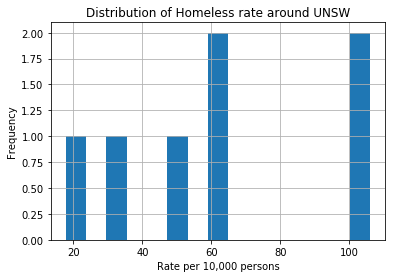

In [66]:
###Histogram Plot####

final_table.Value.hist(bins=15)

plt.xlabel("Rate per 10,000 persons")
plt.ylabel("Frequency")
plt.title("Distribution of Homeless rate around UNSW");


In [68]:
###Centorid function for labels###

def add_centroid(row):
    return row.geometry.centroid

final_table["centroid"] = final_table.apply(add_centroid, axis=1)

In [69]:
###Increases plot size###

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

Text(0.5, 1.0, 'Map of the Rate of Homeless around UNSW')

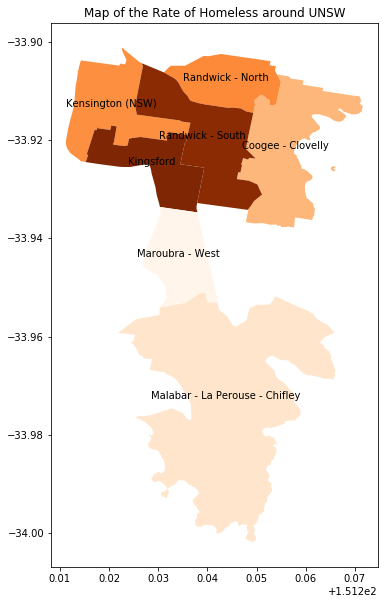

In [75]:
final_table.plot(column='Value', cmap='Oranges');

for idx, row in final_table.iterrows():
    plt.annotate(s=row.Area, 
                 xy=tuple(row.centroid.coords)[0],
                 horizontalalignment='center')
    
plt.title("Map of the Rate of Homeless around UNSW")



MORE RESULTS:
with other fun data!!!!

